# Setup

In [2]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import numpy as np

In [10]:
directory = "data/working_data"

df = pd.read_csv(f"{directory}/sietske/Linear Accelerometer.csv")

In [11]:
# Initialize the label column with -1
df['low_movement'] = 0  

# Define the threshold
threshold = 0.2

# Create the 'label' column and set it to -1 where 'X (m/s^2)' > threshold
# df.loc[(df['X (m/s^2)'] <= threshold) & (df['Y (m/s^2)'] <= threshold) & (df['Z (m/s^2)'] <= threshold), 'low_movement'] = 1
df.loc[(df['X (m/s^2)'] <= threshold) & (df['Y (m/s^2)'] <= threshold), 'low_movement'] = 1

window_size = 200
df['rolling_avg'] = df['low_movement'].rolling(window=window_size, center=True).mean()

# Define a threshold for high concentration of low movement
threshold = 0.5

# Create a new column to identify periods of high concentration of low movement
df['low_movement_concentration'] = (df['rolling_avg'] >= threshold).astype(int)

In [12]:
df = df[df['Time (s)'] >= 8]
df.loc[(df['Time (s)'] > 90) & (df['Time (s)'] < 120), 'low_movement_concentration'] = 0

In [7]:
df["X (m/s^2)"] = np.log(df["X (m/s^2)"])
df["Y (m/s^2)"] = np.log(df["Y (m/s^2)"])
df["Z (m/s^2)"] = np.log(df["Z (m/s^2)"])

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


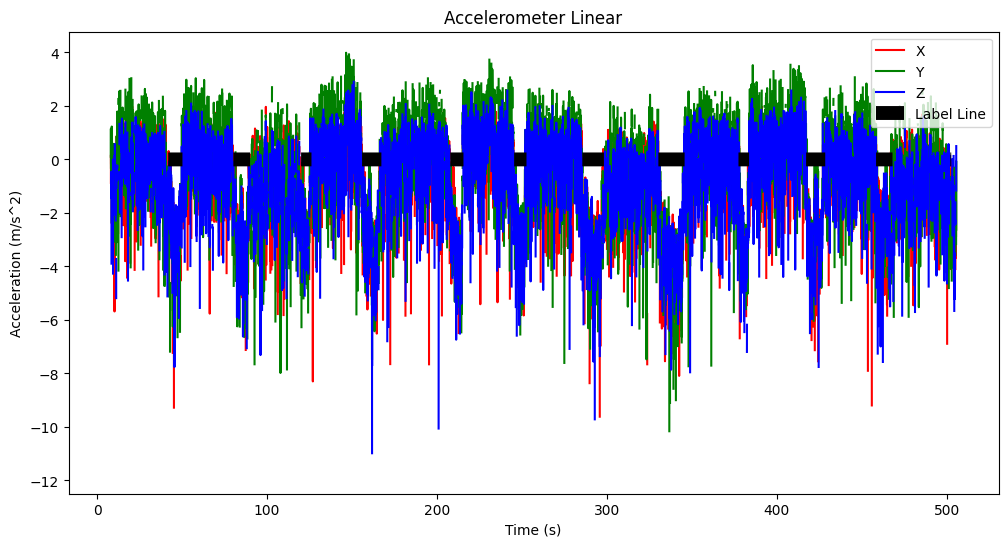

In [9]:
# Copy the DataFrame for plotting
accelerometer_linear = df.copy()

# Create a new column for plotting the label line
accelerometer_linear['label_line'] = np.where(accelerometer_linear['low_movement_concentration'] == 1, 0, np.nan)  # Set to a value below the graph's min

# Create the plot
plt.figure(figsize=(12, 6))
plt.plot(accelerometer_linear['Time (s)'], accelerometer_linear['X (m/s^2)'], color='r', label='X')
plt.plot(accelerometer_linear['Time (s)'], accelerometer_linear['Y (m/s^2)'], color='g', label='Y')
plt.plot(accelerometer_linear['Time (s)'], accelerometer_linear['Z (m/s^2)'], color='b', label='Z')

# Add line for the labels with increased thickness
plt.plot(accelerometer_linear['Time (s)'], accelerometer_linear['label_line'], color='k', label='Label Line', linestyle='--', linewidth=10)

# Add title and labels
plt.title('Accelerometer Linear')
plt.xlabel('Time (s)')
plt.ylabel('Acceleration (m/s^2)')

# Add legend
plt.legend(loc='upper right')

# Show the plot
plt.show()

In [328]:
# Create lag variable
df['low_lag'] = df['low_movement_concentration'].shift(1)
df.loc[0, 'low_lag'] = 0

# Create change variable
df['change'] = df['low_lag'] != df['low_movement_concentration']

In [329]:
sum(df['change'] == 1)

35

In [282]:
# Initialize movement labels
df['movement_label'] = 0
current_label = 0

# Iterate through DataFrame to assign initial labels
for index in range(1, len(df)):
    row = df.iloc[index]
    if row['low_movement_concentration'] == 1 and df.iloc[index - 1]['low_movement_concentration'] == 0:
        current_label += 1
    df.at[index, 'movement_label'] = current_label

# Special handling for labels 3, 8, 12
special_labels = [3, 8, 12]
for label in special_labels:
    indices = df[df['movement_label'] == label].index
    if not indices.empty:
        start_time = df.at[indices[0], 'Time (s)']
        end_time = start_time + 30  # Extend 30 seconds past the initial detection
        
        # Reset low_movement_concentration in the 25 seconds following the first 5 seconds
        reset_start_time = start_time + 5
        reset_end_time = start_time + 30
        reset_indices = df[(df['Time (s)'] > reset_start_time) & (df['Time (s)'] < reset_end_time)].index
        df.loc[reset_indices, 'low_movement_concentration'] = 0

# Optional: output to verify the labels and concentration flags
print(df[['Time (s)', 'low_movement_concentration', 'movement_label']].head(50))

    Time (s)  low_movement_concentration  movement_label
0   0.014004                           0               0
1   0.029105                           0               0
2   0.044206                           0               0
3   0.059307                           0               0
4   0.074409                           0               0
5   0.089510                           0               0
6   0.104611                           0               0
7   0.119712                           0               0
8   0.134814                           0               0
9   0.149915                           0               0
10  0.165016                           0               0
11  0.180117                           0               0
12  0.195219                           0               0
13  0.210320                           0               0
14  0.225421                           0               0
15  0.240522                           0               0
16  0.255624                   